<a href="https://colab.research.google.com/github/DavidkingMazimpaka/MediMatch/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Model for Drug Name Detection

## We'll use TensorFlow and Keras to build and train the neural network.

In [6]:
import warnings
warnings.filterwarnings('ignore')
%pip install tensorflow --quiet

# Import necessary libraries
import os
import yaml
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from PIL import Image

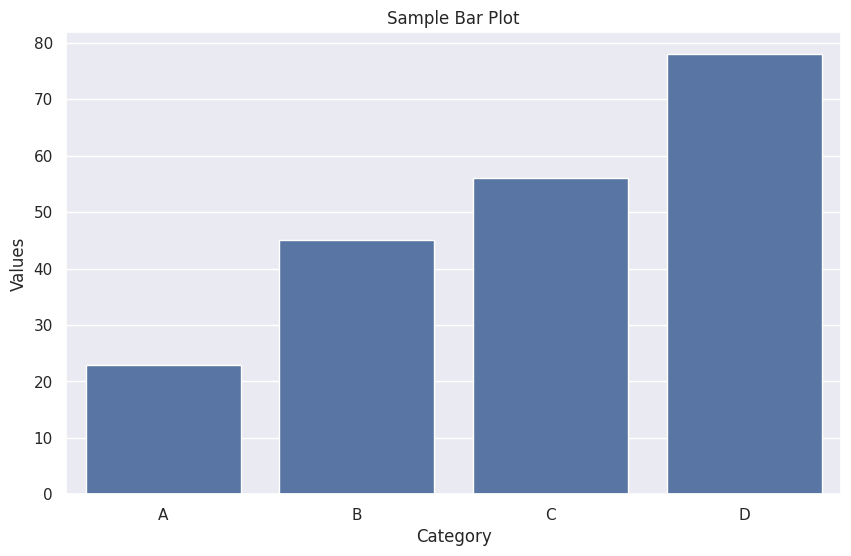

In [7]:
sns.set_theme(style="darkgrid", rc={"axes.unicode_minus": False})

# Set seeds for reproducibility
seed = 1
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Ensure Matplotlib uses the inline backend
%matplotlib inline

# Example usage of the imports (this part can be modified based on your specific use case)
# For demonstration purposes, we will load some sample data and plot it using Matplotlib and Seaborn

# Creating a sample DataFrame
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [23, 45, 56, 78]
})

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Values', data=data)
plt.title('Sample Bar Plot')
plt.show()

Found 1276 images belonging to 2 classes.
Found 365 images belonging to 2 classes.
Found 182 images belonging to 2 classes.
Model summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128

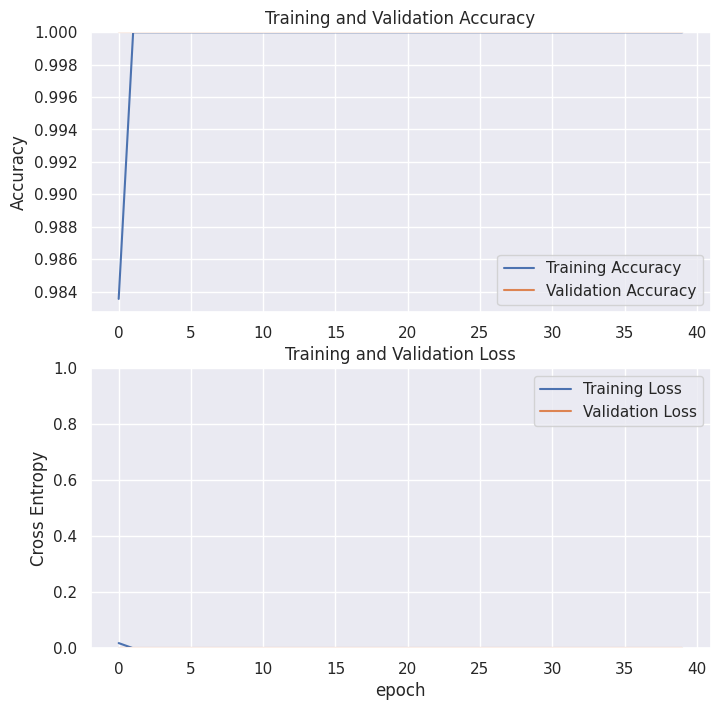


Final model saved as 'final_model.h5'

Evaluating model on test set...
6/6 [==============================] - 42s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0000


In [ ]:
sns.set_theme(style="darkgrid", rc={"axes.unicode_minus": False})

# Set seeds for reproducibility
seed = 1
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Define the simple CNN model
def create_model(num_classes, input_shape=(224, 224, 3)):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Compile the model
def compile_model(model):
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

# Train the model
def train_model(model, train_ds, val_ds, epochs=40, save_period=10):
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath='model_checkpoint_{epoch:02d}.h5',
        save_weights_only=True,
        save_freq=save_period * len(train_ds)
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=[checkpoint_callback],
        verbose=2  # Detailed logging
    )

    return history

# Plot training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

# Load datasets using ImageDataGenerator
def load_data(train_dir, val_dir, test_dir, img_size=(224, 224), batch_size=32):
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_ds = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    val_ds = val_datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_ds = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_ds, val_ds, test_ds

# Example paths (ensure these directories exist)
train_dir = "/content/drive/MyDrive/MediMatch Initiative /Dataset/train"
val_dir = "/content/drive/MyDrive/MediMatch Initiative /Dataset/valid"
test_dir = "/content/drive/MyDrive/MediMatch Initiative /Dataset/test"

# Load the datasets
train_ds, val_ds, test_ds = load_data(train_dir, val_dir, test_dir)

# Check for overlap in datasets
def get_file_paths(directory_iterator):
    return set([os.path.basename(directory_iterator.filenames[i]) for i in range(len(directory_iterator.filenames))])

train_files = get_file_paths(train_ds)
val_files = get_file_paths(val_ds)
test_files = get_file_paths(test_ds)

assert len(train_files.intersection(val_files)) == 0, "Overlap found between training and validation sets!"
assert len(train_files.intersection(test_files)) == 0, "Overlap found between training and test sets!"
assert len(val_files.intersection(test_files)) == 0, "Overlap found between validation and test sets!"

# Create and train the model
num_classes = len(train_ds.class_indices)
model = create_model(num_classes)
compile_model(model)

print("Model summary:")
model.summary()

print("\nStarting training...")
history = train_model(model, train_ds, val_ds, epochs=40, save_period=10)

print("\nTraining complete. Plotting results...")
plot_history(history)

# Save the final model
model.save('final_model.h5')
print("\nFinal model saved as 'final_model.h5'")

# Evaluate the model on the test set
print("\nEvaluating model on test set...")
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy: {test_acc:.4f}')

In [ ]:
def detect_objects(image):
    # Convert image to tensor and add batch dimension
    input_tensor = tf.convert_to_tensor(image)[tf.newaxis, ...]

    # Run inference
    detections = model(input_tensor)

    # Process the results
    boxes = detections[1].numpy()
    classes = detections[3].numpy().astype(int)
    scores = detections[0].numpy()

    return boxes, classes, scores

# Assuming you have an image loaded as a numpy array
boxes, classes, scores = detect_objects(image)

In [ ]:
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/classification/2"
model = tf.keras.Sequential([
    hub.KerasLayer(model_url)
])

In [ ]:
def classify_image(image):
    # Preprocess the image
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.efficientnet.preprocess_input(image)
    image = image[tf.newaxis, ...]

    # Run inference
    predictions = model(image)

    return predictions.numpy()

# Assuming you have an image loaded as a numpy array
predictions = classify_image(image)

In [ ]:
import os
import yaml
import tensorflow as tf
from tensorflow import keras

# Configuration dictionary
config = {
    "path": "/content/drive/MyDrive/MediMatch Initiative /Dataset",
    "train": os.path.join("/content/drive/MyDrive/MediMatch Initiative /Dataset", "train"),
    "val": os.path.join("/content/drive/MyDrive/MediMatch Initiative /Dataset", "valid"),
    "test": os.path.join("/content/drive/MyDrive/MediMatch Initiative /Dataset", "test"),
    "nc": 1,
    "names": ["drug-name"],
}

# Save configuration to YAML file
with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create dataset function
def create_dataset(data_dir):
    data_dir = os.path.abspath(data_dir)
    print(f"Looking for data in: {data_dir}")  # Debug print

    # Use Keras ImageDataGenerator for data augmentation and preprocessing
    datagen = keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.2  # 20% for validation
    )

    # Create dataset
    try:
        dataset = datagen.flow_from_directory(
            data_dir,
            target_size=IMG_SIZE,
            batch_size=BATCH_SIZE,
            class_mode='categorical',
            shuffle=True,
            subset='training'
        )
    except Exception as e:
        print(f"Error creating dataset: {str(e)}")
        print(f"Contents of {data_dir}:")
        print(os.listdir(data_dir))
        raise

    return dataset

# Create validation dataset function
def create_val_dataset(data_dir):
    data_dir = os.path.abspath(data_dir)
    print(f"Looking for validation data in: {data_dir}")  # Debug print

    # Use the same ImageDataGenerator for consistency
    datagen = keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.2
    )

    # Create validation dataset
    try:
        val_dataset = datagen.flow_from_directory(
            data_dir,
            target_size=IMG_SIZE,
            batch_size=BATCH_SIZE,
            class_mode='categorical',
            shuffle=False,
            subset='validation'
        )
    except Exception as e:
        print(f"Error creating validation dataset: {str(e)}")
        print(f"Contents of {data_dir}:")
        print(os.listdir(data_dir))
        raise

    return val_dataset

# Create datasets
try:
    train_ds = create_dataset(config['train'])
    val_ds = create_val_dataset(config['train'])  # Validation set is split from training
    test_ds = create_dataset(config['test'])

    # Print some information about the datasets
    print(f"Number of training batches: {len(train_ds)}")
    print(f"Number of validation batches: {len(val_ds)}")
    print(f"Number of test batches: {len(test_ds)}")
    print(f"Class names: {train_ds.class_indices}")
except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("Current working directory:", os.getcwd())
    print("Contents of current directory:", os.listdir())

Looking for data in: /content/drive/MyDrive/MediMatch Initiative /Dataset/train
Found 1021 images belonging to 2 classes.
Looking for validation data in: /content/drive/MyDrive/MediMatch Initiative /Dataset/train
Found 255 images belonging to 2 classes.
Looking for data in: /content/drive/MyDrive/MediMatch Initiative /Dataset/test
Found 146 images belonging to 2 classes.
Number of training batches: 32
Number of validation batches: 8
Number of test batches: 5
Class names: {'images': 0, 'labels': 1}
